<a href="https://colab.research.google.com/github/being-techie/Time_series_forecast/blob/main/Timeseriesforecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 7.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=faa32aa4f3396b17e0b912c04acd4887e18855c0c758b86db22318653fed7e03
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf

In [ ]:
ticker = yf.Ticker('AAPL')

In [ ]:
data = yf.download('AAPL', start = '2015-01-01', end = '2020-10-31')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.696352,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,24.000614,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,24.002876,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.339447,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.274624,237458000


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-26,114.010002,116.550003,112.879997,115.050003,114.851852,111850700
2020-10-27,115.489998,117.279999,114.540001,116.599998,116.399178,92276800
2020-10-28,115.050003,115.430000,111.099998,111.199997,111.008476,143937800
2020-10-29,112.370003,116.930000,112.199997,115.320000,115.121384,146129200
2020-10-30,111.059998,111.989998,107.720001,108.860001,108.672516,190272600


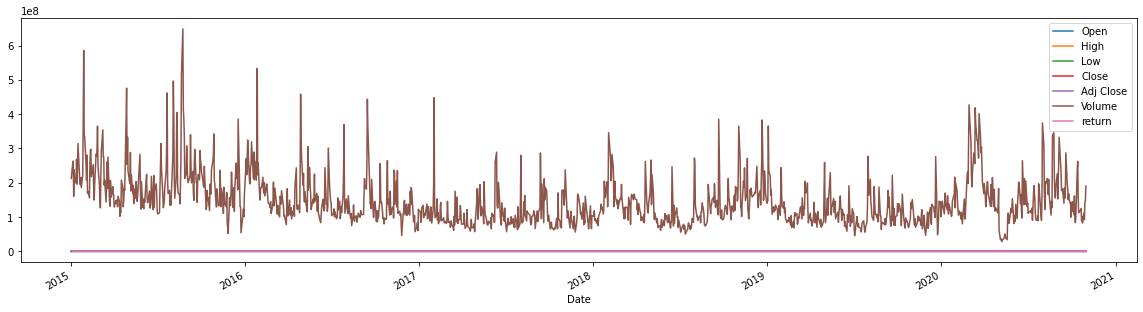

In [ ]:
data.plot(figsize=(20,5))

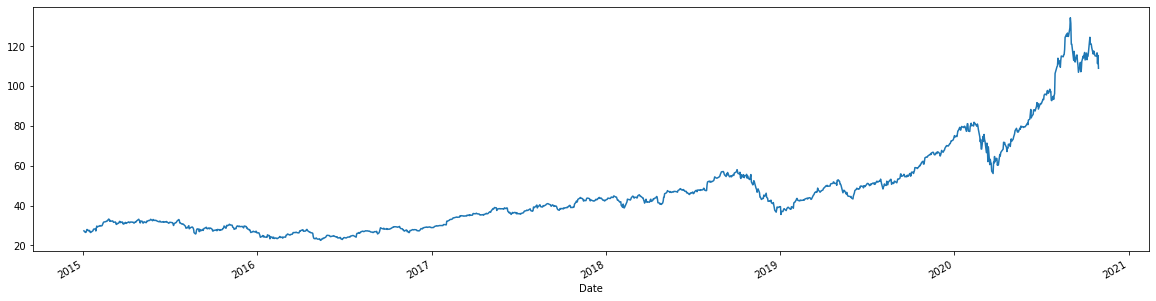

In [ ]:
data['Close'].plot(figsize=(20,5))

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima

In [ ]:
model_auto = auto_arima(data['Close'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
model_auto

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [ ]:
print(model_auto.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1469
Model:               SARIMAX(2, 1, 0)   Log Likelihood               -2290.216
Date:                Wed, 18 Nov 2020   AIC                           4588.432
Time:                        12:24:08   BIC                           4609.598
Sample:                             0   HQIC                          4596.326
                               - 1469                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0618      0.030      2.040      0.041       0.002       0.121
ar.L1         -0.1521      0.011    -13.523      0.000      -0.174      -0.130
ar.L2          0.0509      0.009      5.395      0.0

In [ ]:
!pip install arch

     |████████████████████████████████| 798kB 4.3MB/s 


In [ ]:
from arch import arch_model

# *We* run the arch model on the return of share prices then on actual price 

In [ ]:
data['return'] = 100*data['Close'].pct_change().dropna()

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.696352,212818400,NaN
2015-01-05,27.072500,27.162500,26.352501,26.562500,24.000614,257142000,-2.817161
2015-01-06,26.635000,26.857500,26.157499,26.565001,24.002876,263188400,0.009414
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.339447,160423600,1.402219
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.274624,237458000,3.842227


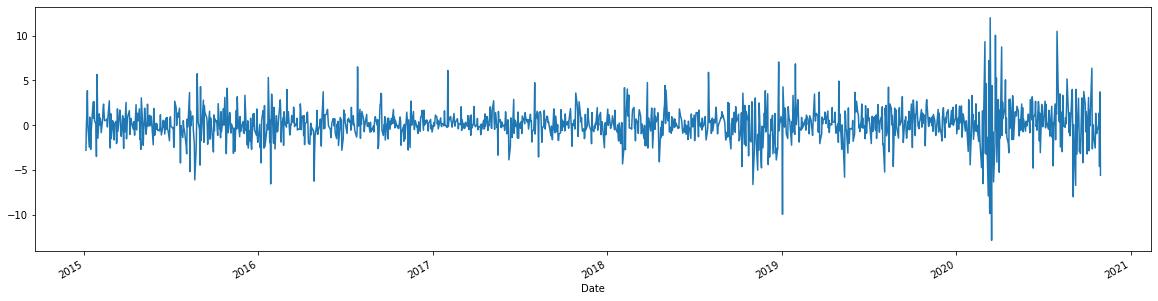

In [ ]:
data['return'].plot(figsize= (20,5))

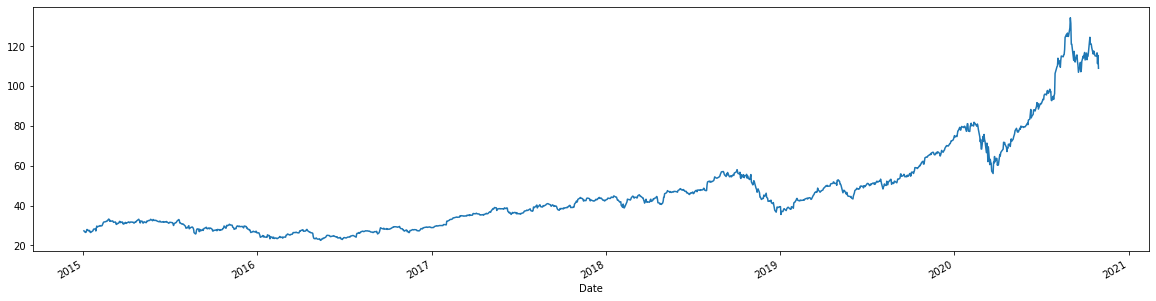

In [ ]:
data['Close'].plot(figsize = (20,5))

In [ ]:
model_arch = arch_model(data['return'].dropna())

In [ ]:
results = model_arch.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2807.5525519484763
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2805.8293940743115
Iteration:      3,   Func. Count:     22,   Neg. LLF: 2803.651347513707
Iteration:      4,   Func. Count:     29,   Neg. LLF: 2802.028141942904
Iteration:      5,   Func. Count:     36,   Neg. LLF: 2800.7911885801814
Iteration:      6,   Func. Count:     43,   Neg. LLF: 2799.9335478879602
Iteration:      7,   Func. Count:     50,   Neg. LLF: 2799.32919919051
Iteration:      8,   Func. Count:     57,   Neg. LLF: 2799.302112688287
Iteration:      9,   Func. Count:     64,   Neg. LLF: 2799.1727566384934
Iteration:     10,   Func. Count:     70,   Neg. LLF: 2799.166599839905
Iteration:     11,   Func. Count:     76,   Neg. LLF: 2799.1663999689445
Iteration:     12,   Func. Count:     82,   Neg. LLF: 2799.1663958972345
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2799.1663958977842
            Iteratio

In [ ]:
print(results.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 return   R-squared:                      -0.002
Mean Model:             Constant Mean   Adj. R-squared:                 -0.002
Vol Model:                      GARCH   Log-Likelihood:               -2799.17
Distribution:                  Normal   AIC:                           5606.33
Method:            Maximum Likelihood   BIC:                           5627.50
                                        No. Observations:                 1468
Date:                Wed, Nov 18 2020   Df Residuals:                     1464
Time:                        12:32:52   Df Model:                            4
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1870  4.099e-02      4.562  5.060e-06 [  0.107,  0.26

In [ ]:
model_arch10 = arch_model(data['return'].dropna(), mean = 'Constant', vol = "ARCH" , p = 6)

In [ ]:
model_arch10.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 2810.586167123997
Iteration:      2,   Func. Count:     23,   Neg. LLF: 2809.3385725588782
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2808.579481455142
Iteration:      4,   Func. Count:     46,   Neg. LLF: 2807.8049738745435
Iteration:      5,   Func. Count:     58,   Neg. LLF: 2806.9784290084754
Iteration:      6,   Func. Count:     70,   Neg. LLF: 2806.614063726033
Iteration:      7,   Func. Count:     82,   Neg. LLF: 2806.3244730050546
Iteration:      8,   Func. Count:     94,   Neg. LLF: 2806.230748156258
Iteration:      9,   Func. Count:    105,   Neg. LLF: 2806.1122743318774
Iteration:     10,   Func. Count:    116,   Neg. LLF: 2805.9184829496103
Iteration:     11,   Func. Count:    127,   Neg. LLF: 2805.8476434951144
Iteration:     12,   Func. Count:    138,   Neg. LLF: 2805.8440924580746
Iteration:     13,   Func. Count:    149,   Neg. LLF: 2805.8257334861796
Iteration:     14,   Func. Count:    159,   Neg. LLF: 2

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                 return   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -2805.83
Distribution:                  Normal   AIC:                           5627.65
Method:            Maximum Likelihood   BIC:                           5669.98
                                        No. Observations:                 1468
Date:                Wed, Nov 18 2020   Df Residuals:                     1460
Time:                        12:35:36   Df Model:                            8
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1738  4.168e-02      4.170  3.046e-05 [9.211e-0

In [ ]:
model_arch_select = arch_model(data['return'].dropna(), mean = 'AR', lags = [2], vol = "ARCH", p = 3)

In [ ]:
model_arch_select.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2847.1911161659514
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2842.639841315493
Iteration:      3,   Func. Count:     30,   Neg. LLF: 2842.5008574758735
Iteration:      4,   Func. Count:     40,   Neg. LLF: 2842.392957051571
Iteration:      5,   Func. Count:     50,   Neg. LLF: 2842.305909107853
Iteration:      6,   Func. Count:     60,   Neg. LLF: 2842.288142005505
Iteration:      7,   Func. Count:     69,   Neg. LLF: 2842.175294990562
Iteration:      8,   Func. Count:     79,   Neg. LLF: 2842.1036838946598
Iteration:      9,   Func. Count:     87,   Neg. LLF: 2842.0980964923883
Iteration:     10,   Func. Count:     95,   Neg. LLF: 2842.098088338017
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2842.098088338029
            Iterations: 10
            Function evaluations: 95
            Gradient evaluations: 10


                           AR - ARCH Model Results                            
Dep. Variable:                 return   R-squared:                      -0.010
Mean Model:                        AR   Adj. R-squared:                 -0.011
Vol Model:                       ARCH   Log-Likelihood:               -2842.10
Distribution:                  Normal   AIC:                           5696.20
Method:            Maximum Likelihood   BIC:                           5727.94
                                        No. Observations:                 1466
Date:                Wed, Nov 18 2020   Df Residuals:                     1460
Time:                        12:36:38   Df Model:                            6
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          0.1536  4.633e-02      3.315  9.180e-04 [6.276e-0